# Session 3: Computer Vision and CNN

## Demo 1: Extracting RGB Color Values From An Image

In [9]:
# Importing libraries
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
import matplotlib.pyplot as plt

In [20]:
# Loading the image
im = load_img('./ressources/cat-image.jpg' )
# Plotting/Showing the loaded image
plt.imshow(im)

NameError: name 'load_img' is not defined

In [11]:
# Converting image to a 3D array
imRGB = img_to_array(im)
# Shape of the image
img_to_array(im).shape

(855, 640, 3)

In [12]:
imRGB

array([[[153., 159., 171.],
        [154., 160., 172.],
        [156., 162., 176.],
        ...,
        [180., 192., 208.],
        [180., 192., 208.],
        [179., 191., 207.]],

       [[153., 159., 171.],
        [155., 161., 173.],
        [157., 163., 177.],
        ...,
        [180., 192., 208.],
        [180., 192., 208.],
        [179., 191., 207.]],

       [[153., 159., 171.],
        [155., 161., 173.],
        [157., 163., 177.],
        ...,
        [180., 192., 208.],
        [180., 192., 208.],
        [179., 191., 207.]],

       ...,

       [[184., 170., 161.],
        [195., 183., 169.],
        [179., 168., 150.],
        ...,
        [255., 251., 250.],
        [241., 237., 236.],
        [232., 228., 227.]],

       [[202., 185., 177.],
        [180., 166., 153.],
        [170., 159., 141.],
        ...,
        [244., 243., 241.],
        [228., 227., 225.],
        [250., 249., 247.]],

       [[181., 164., 156.],
        [161., 145., 132.],
        [214., 2

In [13]:
# Creating three different images, for R(Red), G(Green), and B(Blue)
imR, imG, imB = imRGB.copy(), imRGB.copy(), imRGB.copy()
imR[:,:,[1,2]]=0.
imG[:,:,[0,2]]=0.
imB[:,:,[0,1]]=0.

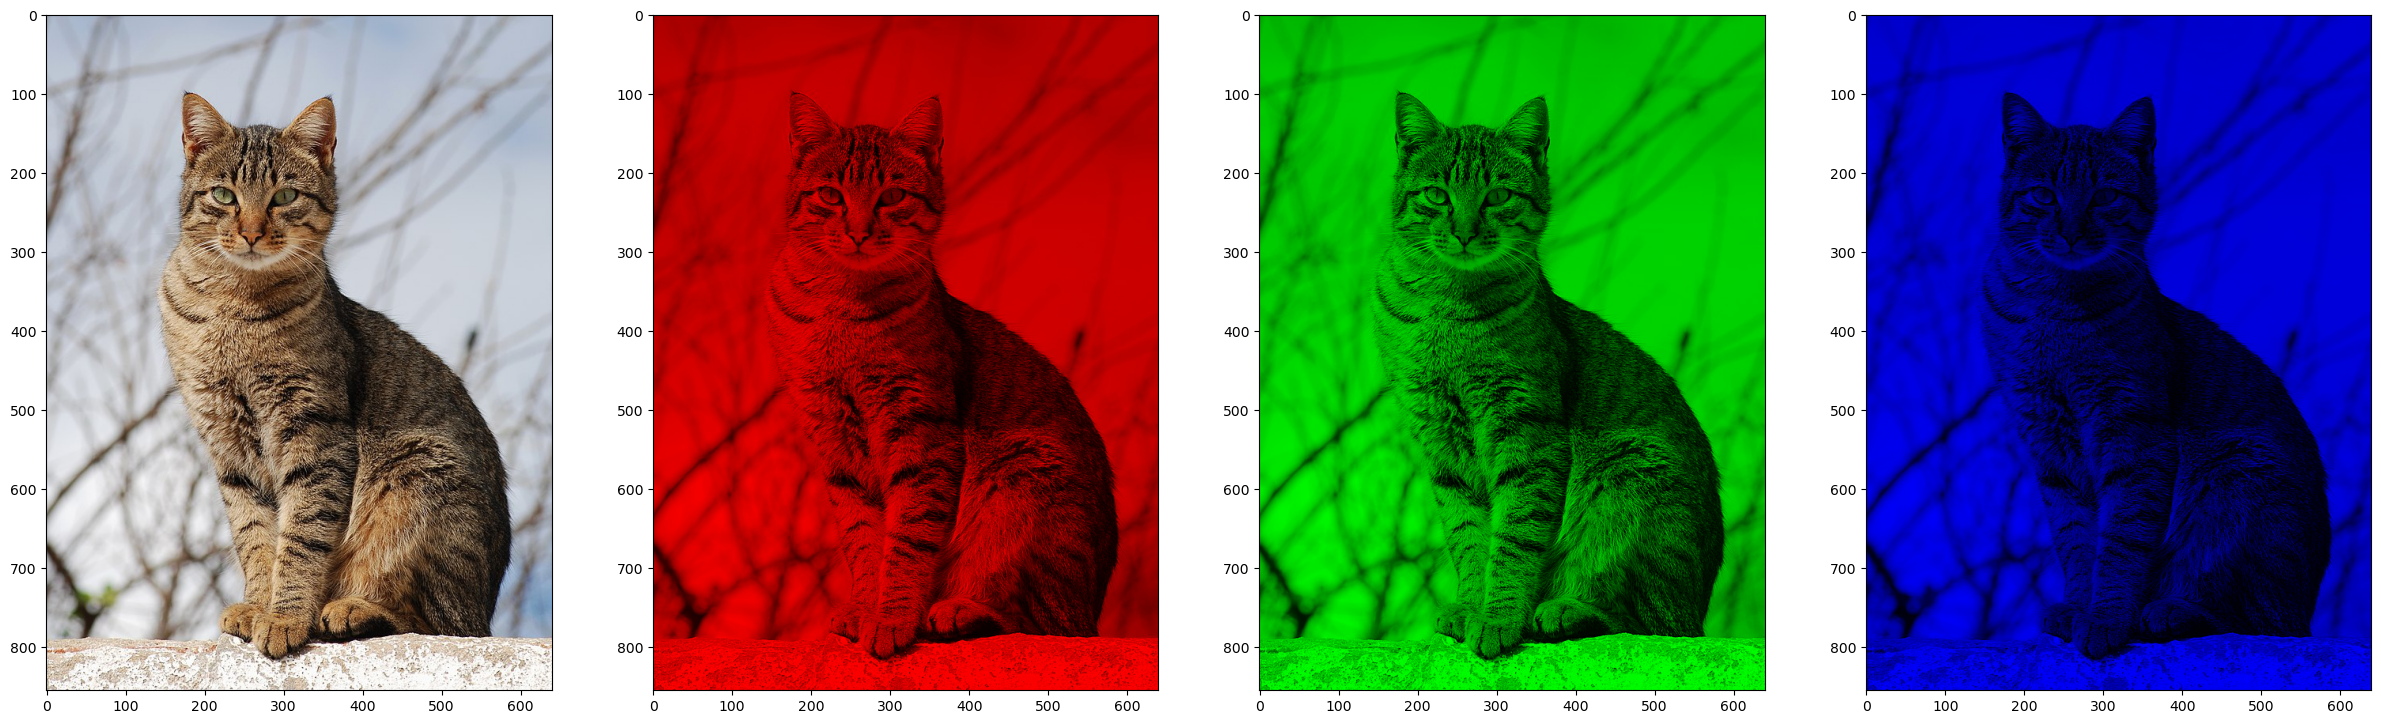

In [14]:
# Plotting/Showing the figures
plt.figure(figsize=(30,20))
plt.subplot(1,4,1)
plt.imshow(im)
plt.subplot(1,4,2)
plt.imshow(array_to_img(imR))
plt.subplot(1,4,3)
plt.imshow(array_to_img(imG))
plt.subplot(1,4,4)
plt.imshow(array_to_img(imB))

## Demo 2: Permuted MNIST

A neural network learned on permuted MNIST can also predict with a good score the permuted MNIST images and this shows that the MLP does not give importance to the local structure

In [15]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

In [16]:
# Loading the training and test sets from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
rng = np.random.RandomState()

In [18]:
perm = rng.permutation(784)

In [19]:
X_train_perm = X_train.reshape(60000, 784)[:,perm].reshape(60000, 28, 28)
X_test_perm = X_test.reshape(10000, 784)[:,perm].reshape(10000, 28, 28)

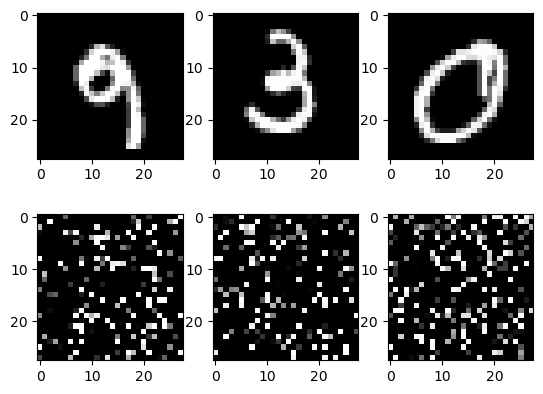

In [20]:
randindices = np.random.randint(X_train.shape[0],size=3)
plt.figure()
plt.subplot(2,3,1)
plt.imshow(X_train[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(X_train[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(X_train[randindices[2],:,:], cmap='gray')
#######
plt.subplot(2,3,4)
plt.imshow(X_train_perm[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,5)
plt.imshow(X_train_perm[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,6)
plt.imshow(X_train_perm[randindices[2],:,:], cmap='gray')

In [21]:
X_train_perm = X_train_perm.reshape(60000, 784)
X_test_perm = X_test_perm.reshape(10000, 784)
X_train_perm = X_train_perm.astype('float32')
X_test_perm = X_test_perm.astype('float32')
print(X_train_perm.shape[0], 'train samples')
print(X_test_perm.shape[0], 'test samples')

60000 train samples
10000 test samples


In [22]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [25]:
batch_size = 128
epochs = 20

In [26]:
X_train_perm.shape

(60000, 784)

In [27]:
history = model.fit(X_train_perm, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(X_test_perm, y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 3.0811 - accuracy: 0.8726 - val_loss: 0.3988 - val_accuracy: 0.9375
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4498 - accuracy: 0.9218 - val_loss: 0.1952 - val_accuracy: 0.9529
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2540 - accuracy: 0.9397 - val_loss: 0.1536 - val_accuracy: 0.9592
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1953 - accuracy: 0.9500 - val_loss: 0.1505 - val_accuracy: 0.9618
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1661 - accuracy: 0.9556 - val_loss: 0.1376 - val_accuracy: 0.9667
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1483 - accuracy: 0.9593 - val_loss: 0.1387 - val_accuracy: 0.9666
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1537 - accuracy: 0.9590 - val_loss: 0.1282 - val_accuracy: 0.9671
Epoch 

In [28]:
score = model.evaluate(X_test_perm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1428510993719101
Test accuracy: 0.9743000268936157


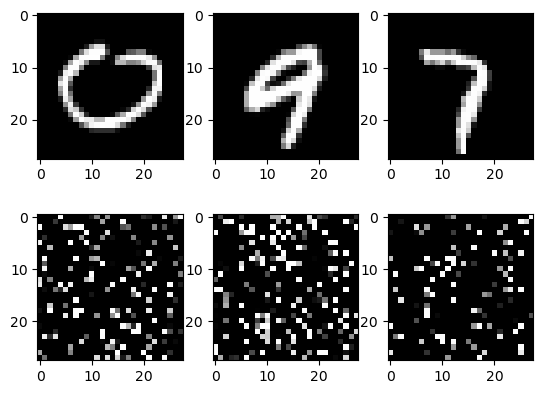

In [29]:
randindices = np.random.randint(X_test.shape[0],size=3)
plt.figure()
plt.subplot(2,3,1)
plt.imshow(X_test[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(X_test[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(X_test[randindices[2],:,:], cmap='gray')
#######
plt.subplot(2,3,4)
plt.imshow(np.reshape(X_test_perm[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(2,3,5)
plt.imshow(np.reshape(X_test_perm[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(2,3,6)
plt.imshow(np.reshape(X_test_perm[randindices[2],:],(28,28)), cmap='gray')

In [30]:
predictions = model.predict(X_test_perm)
print("The NN predicts the number "+ str(np.argmax(predictions[randindices[0],:])) + ' with a confidence of ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("The NN predicts the number "+ str(np.argmax(predictions[randindices[1],:])) + ' with a confidence of ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("The NN predicts the number "+ str(np.argmax(predictions[randindices[2],:])) + ' with a confidence of ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

313/313 [==============================] - 1s 2ms/step
The NN predicts the number 0 with a confidence of 100.0%.
The NN predicts the number 9 with a confidence of 99.99996423721313%.
The NN predicts the number 7 with a confidence of 100.0%.


## Demo 3: Image classification using K-NN

We have seen the K-NN algorithm in the first session (Course + Demos), you can go and check it out on (https://github.com/jairiidriss/mias-m2-deep-learning/)

<b>What is K-NN (K-Nearest Neighbors) ?</b>
<ul>
    <li>Simplest classification algorithm (Lazy learner)</li>
    <li>Uses the most common and nearest classes to find the closest match</li>
</ul>

<b>Problem: </b>Implementing K Nearest Neighbors on CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html)

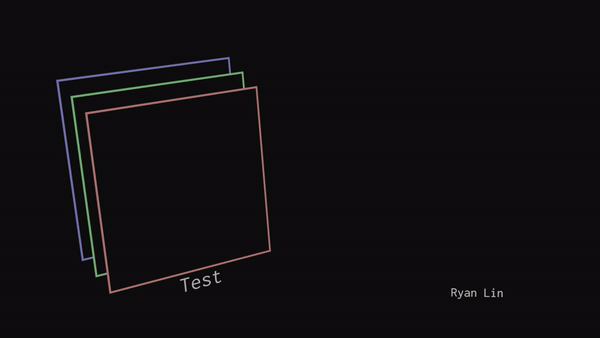

In the visualization above, kNN is operating on a colored (RGB) image dataset of 5x5 pixels - so in total 75 pixels per image (3x5x5). To compute the Eucliden distance between one test image and one training image, the squared difference between corresponding pixels in both images are taken and then then summed and finally taken the square root of. To reiterate, we are taking 75 differences, squaring each one, summing all that together, and then finally square rooting everything. And this occurs for each test image against every training image. It's worth mentioning, in the animation I do not show the 5x5 green and blue pixel channels being iterated over like I did for the red channel; instead the green and blue layers are simplified with a single "blink".

<b>Note: </b>the k in kNN is an integer hyperparameter that says how many neighbors our test image should pay attention to. It tells each test image to find their k nearest neighbors of a particular label, then label them in accordance with those neighbors. If k = 1, then we're asking kNN to classify every test image with it's closest single neighbor. If k = 3, then we're asking kNN to classify a test image with it's 3 closest neighbors (lowest Euclidean distance) of the same class. Some considerations when picking a value for k is to not pick a value that would result in a tie - where the k closest neighbors are an even distribution between different classes. This can generally be avoided by 1) picking odd numbers for k and 2) not picking multiples of the number of classes.

<b>Loading CIFAR-10: </b>Lets now look at using kNN on CIFAR-10. Our data is going to be stored simply in the four variables: X_train, X_test, y_train, and y_test. They are declared simply with:

In [31]:
import tensorflow as tf

In [32]:
"""
   x_train: shape (B, H, W, C) tensor where B is batch size, H
      is height, and W is width, C is channel size
   y_train: shape (B) tensor where B is batch size.
   x_test: shape (B, H, W, C) tensor where B is batch size, H
      is height, and W is width,  C is channel size
   y_test: shape(B) tensor where B is batch size.
"""
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()   

   
# Training Set.
# X_train is composed of 50,000 images where y_train references the corresponding labels
print('Input shape:', X_train.shape)
print('Labels shape:', y_train.shape)

# Test Set
# X_test is composed of 10,000 images where y_test references the corresponding labels
print('Input shape:', X_test.shape)
print('Labels shape', y_test.shape)

Input shape: (50000, 32, 32, 3)
Labels shape: (50000, 1)
Input shape: (10000, 32, 32, 3)
Labels shape (10000, 1)


<b>Visualizing CIFAR-10</b>

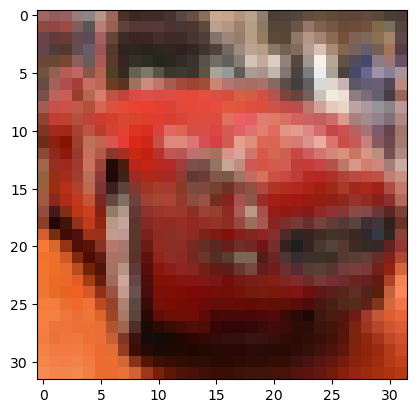

In [33]:
plt.imshow(X_train[5])
plt.show()

Each image is composed of 3x32x32 pixel values. The 3x{32x32} references their height/width and the {3}x32x32 references the color channels, which most of computer vision (to my knowledge) use RGB. The labels are simply a vector of integers ranging from [0,9]. Each integer serves as an index to a corresponding list of classes:

In [34]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plane = 0, car = 1, bird = 2 ... truck = 9

print(X_train[5].shape)

# Finding integer label of corresponding 0th image
print(y_train[5]) 

(32, 32, 3)
[1]


In [35]:
# To simplify things, we are going to subsample, meaning we are going to work on a sample of the data
# Subsample size
num_train = 500
num_test = 250

# Redeclaring X_train...y_test with subsample
X_train = X_train[:num_train]
y_train = y_train[:num_train]
X_test = X_test[:num_test]
y_test = y_test[:num_test]

<b>Building K-NN</b>

<b>Step 1: Finding the euclidean distance</b>

In [36]:
X_train[0].shape

(32, 32, 3)

In [37]:
def compute_distances(x_train, x_test):
    """
    Inputs:
    x_train: shape (num_train, H, W, C) tensor.
    x_test: shape (num_test, H, W, C) tensor.

    Returns:
    dists: shape (num_train, num_test) tensor where dists[j, i] is the
     Euclidean distance between the ith training image and the jth test
     image.
    """

    # Get the number of training and testing images
    num_train = X_train.shape[0] # (500)
    num_test = X_test.shape[0] # (250)

    # dists will be the tensor holding all distance measurements between testing and training
    dists = tf.zeros([num_train, num_test], tf.float64) # (500, 250)

    # Flatten tensors
    train = X_train.flatten('C') 
    test = X_test.flatten('C')

    # Find Euclidean distance using loops
    for i in range(num_test):
        for j in range(num_train):
            print(np.sqrt(np.sum(np.square(train[j] - test[i]))))
            dists[j, i] = np.sqrt(np.sum(np.square(train[j] - test[i])))

    return dists

<b>Step 2: Classifying test imgaes</b>

In [38]:
class KnnClassifier:
    def __init__(self, X_train, y_train):
        """
        x_train: shape (num_train, H, W, C) tensor where num_train is batch size,
        C is channel size, H is height, and W is width.
        y_train: shape (num_train) tensor where num_train is batch size providing labels
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test, k=3):
        """
        x_test: shape (num_test, H, W, C) tensor where num_test is batch size,
        C is channel size, H is height, and W is width.
        k: The number of neighbors to use for prediction
        """

        # Init output shape
        y_test_pred = tf.zeros(X_test.shape[0], dtype=tf.int64)

        # Find & store Euclidean distance between test & train
        dists = compute_distances(self.X_train, X_test)
    
        # Index over test images
        for i in range(dists.shape[1]):
            # Find index of k lowest values
            x = tf.math.top_k(dists[:,i], k, largest=False).indices

            # Index the labels according to x
            k_lowest_labels = self.y_train[x]

            # y_test_pred[i] = the most frequent occuring index
            y_test_pred[i] = tf.math.argmax(tf.math.bincount(k_lowest_labels))

        return y_test_pred

    def check_accuracy(self, X_test, y_test, k=3):
        """
        x_test: shape (num_test, H, W, C) tensor where num_test is batch size,
        C is channel size, H is height, and W is width.
        y_test: shape (num_test) tensor where num_test is batch size providing labels
        k: The number of neighbors to use for prediction

        Returns:
        accuracy: Accuracy of this classifier on the test data, as a percent.
        Python float in the range [0, 100]
        """
        y_test_pred = self.predict(X_test, k=k)
        num_samples = X_test.shape[0]
        num_correct = (y_test == y_test_pred).sum().item()
        accuracy = 100.0 * num_correct / num_samples

        print("Accuracy: ", accuracy)
        return accuracy

In [39]:
classifier = KnnClassifier(X_train, y_train)
classifier.check_accuracy(X_test, y_test, k=5)

8.54400374531753


C:\Users\jairiidriss\AppData\Local\Temp\ipykernel_15472\4251229305.py:27: RuntimeWarning: overflow encountered in scalar subtract
  print(np.sqrt(np.sum(np.square(train[j] - test[i]))))
C:\Users\jairiidriss\AppData\Local\Temp\ipykernel_15472\4251229305.py:28: RuntimeWarning: overflow encountered in scalar subtract
  dists[j, i] = np.sqrt(np.sum(np.square(train[j] - test[i])))


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

## Demo 4: Convolutional Neural Network

A neural network with depth( distance form source to sink more than 2 is called deep neural network)

<b>Example: Convolutional Neural Networks</b> Like other types of neural networks, CNNs consume numerical data.

Therefore, the images fed to these networks must be converted to a numerical representation. Since images are made up of pixels, they are converted into a numerical form that is passed to the CNN.

However, as we will discuss in the upcoming section, how different layers work. Figure below shows a CNN architecture.

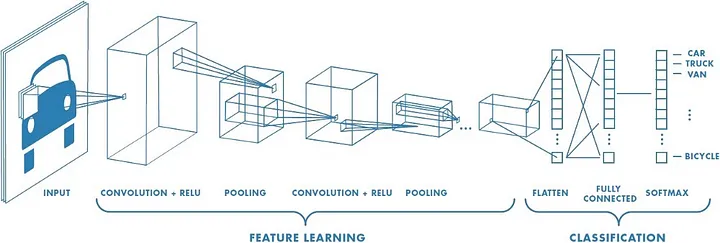

To understand how this works, let’s look at some of the steps involved in training a CNN.

<b>Convolution Layer</b>

Reducing the size of the numerical representation sent to the CNN is done via the convolution operation. This process is vital so that only features that are important in classifying an image are sent to the neural network. Apart from improving the accuracy of the network, this also ensures that minimal compute resources are used in training the network.

The result of the convolution operation is referred to as a feature map, convolved feature, or activation map. Applying a feature detector is what leads to a feature map. The feature detector is also known by other names such as kernel or filter.

The kernel is usually a 3 by 3 matrix. Performing an element-wise multiplication of the kernel with the input image and summing the values, outputs the feature map. This is done by sliding the kernel on the input image. The sliding happens in steps known as strides. The strides and the size of the kernel can be set manually when creating the CNN.

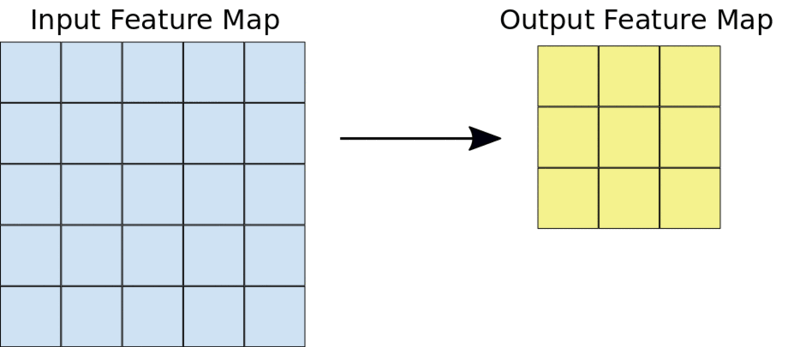

<b>Pooling Layer</b>

In this operation, the size of the feature map is reduced further. There are various pooling methods. A common technique is max-pooling. The size of the pooling filter is usually a 2 by 2 matrix. In max-pooling, the 2 by 2 filter slides over the feature map and picks the largest value in a given box. This operation results in a pooled feature map

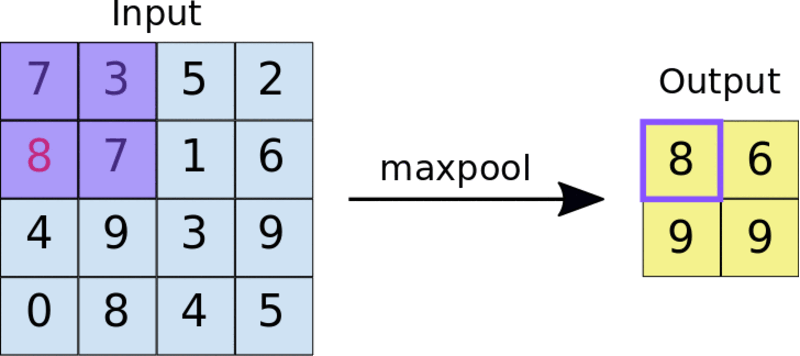

8


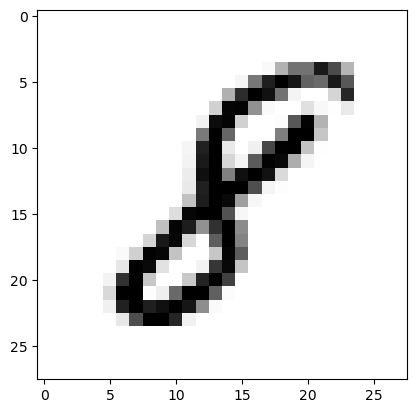

In [3]:
import tensorflow as tf
# import train and test mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
# have a look at the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [7]:
#compile and train the model

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1996 - accuracy: 0.9400
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0846 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0596 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0363 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0310 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0239 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0203 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [8]:
#evaluate the model using the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0567 - accuracy: 0.9848


[0.05674346908926964, 0.9847999811172485]

We achieved 98.5% accuracy with such a basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following code:

1/1 [==============================] - 0s 382ms/step
9


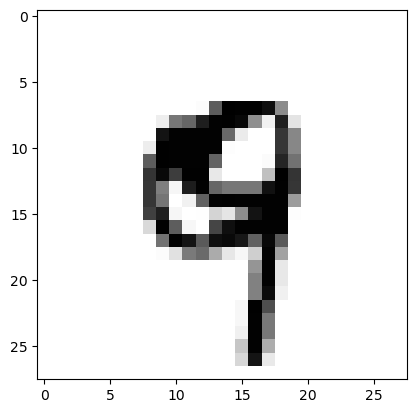

In [9]:
image_index = 4444  
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')   #select the image at given index and show
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1)) # adding batch_size and predicting results
print(pred.argmax())

### TO-DO Exercise:

<li>Increase the accuracy by adding more convolutional layer(s) in the neural network, change the kernel size, increase training epochs, change batch-size, and change learning rate.</li>

<li>Change the dataset to CIFAR10 and try to increase the accuracy above 78 %.</li>

<li>Create a 1D-CNN and compare the accuracy with 2D-CNN.</li>

<li>Explore the idea of transfer learning. You can find some information here: https://keras.io/guides/transfer_learning/</li>

## Demo 5: Transfer Learning

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
dataset, info = tfds.load("tf_flowers", 
                          as_supervised=True, 
                          with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\jairiidriss\tensorflow_datasets\tf_flowers\3.0.1.incompleteSTFIHE\tf_flowers-train.tfrecord…

Dataset tf_flowers downloaded and prepared to C:\Users\jairiidriss\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [4]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info. features["label"].num_classes

In [5]:
n_classes

5

In [7]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load("tf_flowers", 
                                                       split=["train[:10%]", "train[10%:25%]", "train[25%:]"], 
                                                       as_supervised=True)

In [13]:
def preprocess(image,label):
    resized_image = tf.image.resize(image, [224,224])
    final_image = tf.keras.applications.vgg16.preprocess_input(resized_image)
    return final_image, label

In [14]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [15]:
base_model = tf.keras.applications.vgg16.VGG16(weights="imagenet", 
                                            include_top=False)


avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)


model = tf.keras.Model(inputs=base_model.input, outputs=output)

58889256/58889256 [==============================] - 4s 0us/step


In [16]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2, 
                                    momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])


history = model.fit(train_set, 
                    epochs=5, 
                    validation_data=valid_set)

Epoch 1/5
57/86 [==================>...........] - ETA: 1:40 - loss: 124.5869 - accuracy: 0.7171

In [ ]:
## If you are interested in fine-tuning all the other layers
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,
                                    momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])

history = model.fit(train_set, 
                    epochs=10, 
                    validation_data=valid_set)